In [1]:
import numpy as np
import sys, os, shutil
import pandas as pd
import collections as cl
import itertools as it
import timeit
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import copy as cp

#Change directory
os.chdir("C:/Users/yche465/Desktop/CS570/Project")
os.getcwd()

'C:\\Users\\yche465\\Desktop\\CS570\\Project'

In [2]:
import pickle
pickle_in=open("sPDC_DISTM","rb")
loadobj=pickle.load(pickle_in)

In [3]:
DISTM_15=loadobj["DISTM_15"]
DISTM_10=loadobj["DISTM_10"]
DISTM_5=loadobj["DISTM_5"]
DISTM_1=loadobj["DISTM_1"]
PDC_S1_sample15=loadobj['PDC_S1_sample15']
PDC_S1_sample10=loadobj['PDC_S1_sample10']
PDC_S1_sample5=loadobj['PDC_S1_sample5']
PDC_S1_sample1=loadobj['PDC_S1_sample1']

### Determine the minimal sufficient sample size for hierarchical clustering

In [4]:
from sklearn.cluster import AgglomerativeClustering as AHC

In [5]:
# create helper functions for computing silhouette indices for k= 2 ~ 12
from tslearn.clustering import silhouette_score as tsil_index
def TS_SIL(dist_data):
    DISTM=dist_data
    Ts_Sil=[]
    S2_cluster_label=[]
    for i in range(len(DISTM)):
        print("S1 Cluster ",i)
        #loop for generating cluster validation indices
        SIL=[]
        S2C=[]
        for k in range(2,13):
            cluster = AHC(affinity='precomputed', linkage='average',n_clusters=k).fit(DISTM[i])
            cluster_labels=cluster.labels_
            S2C.append(cluster_labels)
            
            #cluster validation: silhouette
            SL_avg =tsil_index(DISTM[i], cluster_labels, metric="precomputed")
            SIL.append(SL_avg)
        Ts_Sil.append(SIL)
        S2_cluster_label.append(S2C)
    return Ts_Sil, S2_cluster_label

C:\Users\yche465\Anaconda3\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


In [6]:
#Implement the function for computing silhouette indices for each sample dataset
Ts_Sil_1,S2C_Label_1 =TS_SIL(DISTM_1)
Ts_Sil_5,S2C_Label_5=TS_SIL(DISTM_5)
Ts_Sil_10,S2C_Label_10=TS_SIL(DISTM_10)
Ts_Sil_15,S2C_Label_15=TS_SIL(DISTM_15)

S1 Cluster  0
S1 Cluster  1
S1 Cluster  2
S1 Cluster  3
S1 Cluster  0
S1 Cluster  1
S1 Cluster  2
S1 Cluster  3
S1 Cluster  0
S1 Cluster  1
S1 Cluster  2
S1 Cluster  3
S1 Cluster  0
S1 Cluster  1
S1 Cluster  2
S1 Cluster  3


(0.0, 1.0)

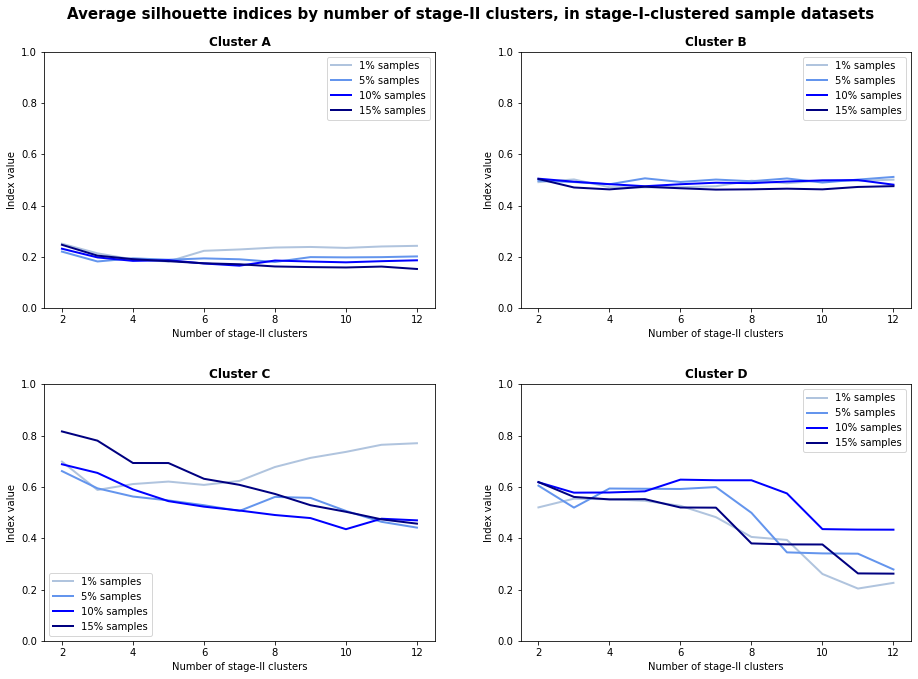

In [10]:
lin=np.arange(2,13)
fig,ax =  plt.subplots(2,2,figsize=(14,10))
fig.tight_layout(pad=5.5)
fig.suptitle('Average silhouette indices by number of stage-II clusters, in stage-I-clustered sample datasets',fontsize=15,fontweight="bold")
#Cluster 1
ax[0][0].set_title("Cluster A", fontsize=12,fontweight="bold")
ax[0][0].plot(lin,Ts_Sil_1[0], "lightsteelblue", linewidth=2, label="1% samples")
ax[0][0].plot(lin,Ts_Sil_5[0], "cornflowerblue", linewidth=2,label="5% samples")
ax[0][0].plot(lin,Ts_Sil_10[0], "blue", linewidth=2, label="10% samples")
ax[0][0].plot(lin,Ts_Sil_15[0], "navy", linewidth=2,label="15% samples")
ax[0][0].set_xlabel('Number of stage-II clusters', fontsize=10)
ax[0][0].set_ylabel('Index value', fontsize=10)
ax[0][0].legend()
ax[0][0].set_ylim(0,1)

#Cluster 2
ax[0][1].set_title("Cluster B", fontsize=12,fontweight="bold")
ax[0][1].plot(lin,Ts_Sil_1[1], "lightsteelblue", linewidth=2, label="1% samples")
ax[0][1].plot(lin,Ts_Sil_5[1], "cornflowerblue", linewidth=2,label="5% samples")
ax[0][1].plot(lin,Ts_Sil_10[1], "blue", linewidth=2, label="10% samples")
ax[0][1].plot(lin,Ts_Sil_15[1], "navy", linewidth=2,label="15% samples")
ax[0][1].set_xlabel('Number of stage-II clusters', fontsize=10)
ax[0][1].set_ylabel('Index value', fontsize=10)
ax[0][1].legend()
ax[0][1].set_ylim(0,1)

#Cluster 3
ax[1][0].set_title("Cluster C", fontsize=12,fontweight="bold")
ax[1][0].plot(lin,Ts_Sil_1[2], "lightsteelblue", linewidth=2, label="1% samples")
ax[1][0].plot(lin,Ts_Sil_5[2], "cornflowerblue", linewidth=2,label="5% samples")
ax[1][0].plot(lin,Ts_Sil_10[2], "blue", linewidth=2, label="10% samples")
ax[1][0].plot(lin,Ts_Sil_15[2], "navy", linewidth=2,label="15% samples")
ax[1][0].set_xlabel('Number of stage-II clusters', fontsize=10)
ax[1][0].set_ylabel('Index value', fontsize=10)
ax[1][0].legend()
ax[1][0].set_ylim(0,1)

#Cluster 4
ax[1][1].set_title("Cluster D", fontsize=12,fontweight="bold")
ax[1][1].plot(lin,Ts_Sil_1[3], "lightsteelblue", linewidth=2, label="1% samples")
ax[1][1].plot(lin,Ts_Sil_5[3], "cornflowerblue", linewidth=2,label="5% samples")
ax[1][1].plot(lin,Ts_Sil_10[3], "blue", linewidth=2, label="10% samples")
ax[1][1].plot(lin,Ts_Sil_15[3], "navy", linewidth=2,label="15% samples")
ax[1][1].set_xlabel('Number of stage-II clusters', fontsize=10)
ax[1][1].set_ylabel('Index value', fontsize=10)
ax[1][1].legend()
ax[1][1].set_ylim(0,1)

### Determine the optimal number of Stage-II cluster for each Stage-I cluster sample dataset

In [12]:
#Build a helper function to group the PDC sample data according to the Stage-II cluster label under each k 
def group_PDC(S1C1_PDC_sample,S1C1_label_byK,kmax):
    S1C1_PDC_Sample_labeled=[]
    for i,K in enumerate(np.arange(2,kmax)):
        P=[]
        for k in range(K):
            P.append(S1C1_PDC_sample[S1C1_label_byK[i]==k])
        S1C1_PDC_Sample_labeled.append(P)
    return S1C1_PDC_Sample_labeled


In [13]:
# create Stage-II cluster label list for each Stage-I cluster: [cluster 1] [cluster 2 k=?] [label]  
S1C1_label_byK=S2C_Label_5[0]
S1C2_label_byK=S2C_Label_5[1]
S1C3_label_byK=S2C_Label_15[2]
S1C4_label_byK=S2C_Label_15[3]

#create the selected PDC sample data for each Stage-I cluster 
S1C1_PDC_sample5=PDC_S1_sample5[0]
S1C2_PDC_sample5=PDC_S1_sample5[1]
S1C3_PDC_sample15=PDC_S1_sample15[2]
S1C4_PDC_sample15=PDC_S1_sample15[3]

In [14]:
S1C1_PDC_Sample5_labeled=group_PDC(S1C1_PDC_sample5,S1C1_label_byK,13)
S1C2_PDC_Sample5_labeled=group_PDC(S1C2_PDC_sample5,S1C2_label_byK,13)
S1C3_PDC_Sample15_labeled=group_PDC(S1C3_PDC_sample15,S1C3_label_byK,13)
S1C4_PDC_Sample15_labeled=group_PDC(S1C4_PDC_sample15,S1C4_label_byK,13)

In [20]:
## Build a helper function to calculate barycenter average centroid for each k value (k=2~12)
from tslearn.barycenters import dtw_barycenter_averaging
param={"global_constraint":"sakoe_chiba", "sakoe_chiba_radius":10}

def SC_DBA(SC_PDC_Sample_labeled):
    SC_DBA=[]
    for j in range(len(SC_PDC_Sample_labeled)):
        print("Complete k=",j+2)
        dba=[]
        for i in range(len(SC_PDC_Sample_labeled[j])): 
            a=dtw_barycenter_averaging(SC_PDC_Sample_labeled[j][i], max_iter=10, metric_params=param)
            dba.append(a)
        SC_DBA.append(dba)
    return SC_DBA

In [21]:
#Compute the cluster-specific DBA centroids under each k value
print("Cluster A")
S1C1_DBA_Sample5 =SC_DBA(S1C1_PDC_Sample5_labeled)
print("Cluster B")
S1C2_DBA_Sample5=SC_DBA(S1C2_PDC_Sample5_labeled)
print("Cluster C")
S1C3_DBA_Sample15=SC_DBA(S1C3_PDC_Sample15_labeled)
print("Cluster D")
S1C4_DBA_Sample15=SC_DBA(S1C4_PDC_Sample15_labeled)

Cluster A
Complete k= 2
Complete k= 3
Complete k= 4
Complete k= 5
Complete k= 6
Complete k= 7
Complete k= 8
Complete k= 9
Complete k= 10
Complete k= 11
Complete k= 12
Cluster B
Complete k= 2
Complete k= 3
Complete k= 4
Complete k= 5
Complete k= 6
Complete k= 7
Complete k= 8
Complete k= 9
Complete k= 10
Complete k= 11
Complete k= 12
Cluster C
Complete k= 2
Complete k= 3
Complete k= 4
Complete k= 5
Complete k= 6
Complete k= 7
Complete k= 8
Complete k= 9
Complete k= 10
Complete k= 11
Complete k= 12
Cluster D
Complete k= 2
Complete k= 3
Complete k= 4
Complete k= 5
Complete k= 6
Complete k= 7
Complete k= 8
Complete k= 9
Complete k= 10
Complete k= 11
Complete k= 12


In [22]:
from tslearn.metrics import dtw
#Compute Sum of Squared Error by k values for each stage-I cluster sample dataset 
S1C1_SSE=[]
for k in range(len(S1C1_PDC_Sample5_labeled)):         
    d=[dtw(S1C1_PDC_Sample5_labeled[k][cluster_id][i],S1C1_DBA_Sample5[k][cluster_id],
        global_constraint="sakoe_chiba", sakoe_chiba_radius=10) 
        for cluster_id in range(len(S1C1_PDC_Sample5_labeled[k])) 
        for i in range(len(S1C1_PDC_Sample5_labeled[k][cluster_id]))]
    SSE=sum(np.square(d))
    S1C1_SSE.append(SSE)
    
S1C2_SSE=[]
for k in range(len(S1C2_PDC_Sample5_labeled)):         
    d=[dtw(S1C2_PDC_Sample5_labeled[k][cluster_id][i],S1C2_DBA_Sample5[k][cluster_id],
        global_constraint="sakoe_chiba", sakoe_chiba_radius=10) 
        for cluster_id in range(len(S1C2_PDC_Sample5_labeled[k])) 
        for i in range(len(S1C2_PDC_Sample5_labeled[k][cluster_id]))]
    SSE=sum(np.square(d))
    S1C2_SSE.append(SSE)

S1C3_SSE=[]
for k in range(len(S1C3_PDC_Sample15_labeled)):         
    d=[dtw(S1C3_PDC_Sample15_labeled[k][cluster_id][i],S1C3_DBA_Sample15[k][cluster_id],
        global_constraint="sakoe_chiba", sakoe_chiba_radius=10) 
        for cluster_id in range(len(S1C3_PDC_Sample15_labeled[k])) 
        for i in range(len(S1C3_PDC_Sample15_labeled[k][cluster_id]))]
    SSE=sum(np.square(d))
    S1C3_SSE.append(SSE)

S1C4_SSE=[]
for k in range(len(S1C4_PDC_Sample15_labeled)):         
    d=[dtw(S1C4_PDC_Sample15_labeled[k][cluster_id][i],S1C4_DBA_Sample15[k][cluster_id],
        global_constraint="sakoe_chiba", sakoe_chiba_radius=10) 
        for cluster_id in range(len(S1C4_PDC_Sample15_labeled[k])) 
        for i in range(len(S1C4_PDC_Sample15_labeled[k][cluster_id]))]
    SSE=sum(np.square(d))
    S1C4_SSE.append(SSE)

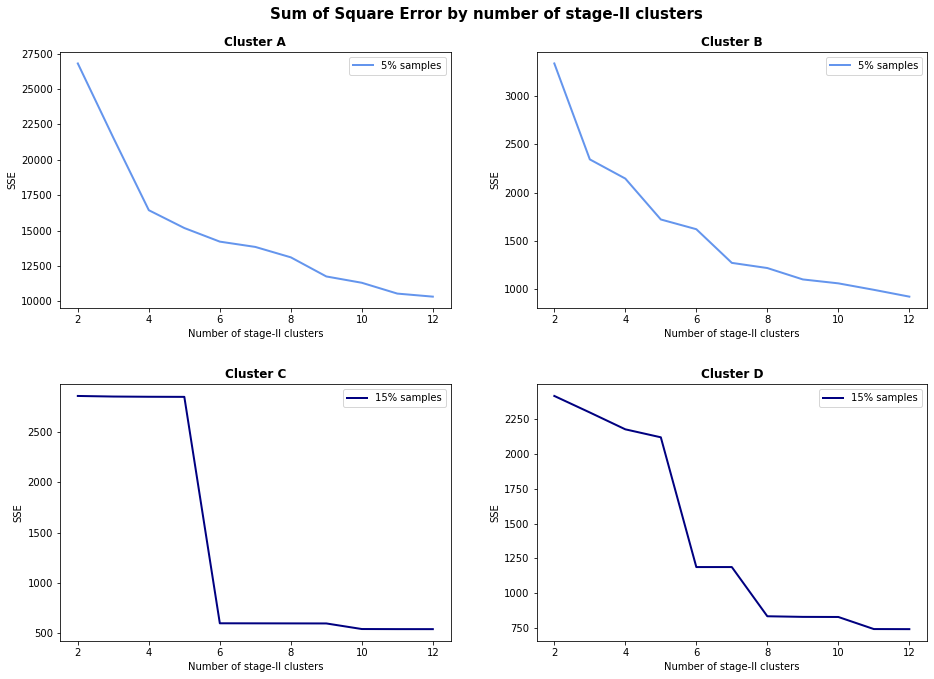

In [23]:
#Graph the trends of SSE by k values for each stage-I cluster sample dataset
lin=np.arange(2,13)
fig,ax =  plt.subplots(2,2,figsize=(14,10))
fig.tight_layout(pad=5.5)
fig.suptitle('Sum of Square Error by number of stage-II clusters',fontsize=15,fontweight="bold")
#Cluster A
ax[0][0].set_title("Cluster A", fontsize=12,fontweight="bold")
ax[0][0].plot(lin,S1C1_SSE, "cornflowerblue", linewidth=2,label="5% samples")
ax[0][0].set_xlabel('Number of stage-II clusters', fontsize=10)
ax[0][0].set_ylabel('SSE', fontsize=10)
ax[0][0].legend()

#Cluster B
ax[0][1].set_title("Cluster B", fontsize=12,fontweight="bold")
ax[0][1].plot(lin,S1C2_SSE, "cornflowerblue", linewidth=2,label="5% samples")
ax[0][1].set_xlabel('Number of stage-II clusters', fontsize=10)
ax[0][1].set_ylabel('SSE', fontsize=10)
ax[0][1].legend()

#Cluster C
ax[1][0].set_title("Cluster C", fontsize=12,fontweight="bold")
ax[1][0].plot(lin,S1C3_SSE, "navy", linewidth=2,label="15% samples")
ax[1][0].set_xlabel('Number of stage-II clusters', fontsize=10)
ax[1][0].set_ylabel('SSE', fontsize=10)
ax[1][0].legend()

#Cluster D
ax[1][1].set_title("Cluster D", fontsize=12,fontweight="bold")
ax[1][1].plot(lin,S1C4_SSE, "navy", linewidth=2,label="15% samples")
ax[1][1].set_xlabel('Number of stage-II clusters', fontsize=10)
ax[1][1].set_ylabel('SSE', fontsize=10)
ax[1][1].legend()

In [24]:
#Create list objects to store the selected k values that need to be evaluated with silhouette index
from sklearn.metrics import silhouette_samples as sil_samp
C1_test=np.array([7,8,9])
C2_test=np.array([5,6,7])
C3_test=np.array([4,5])
C4_test=np.array([6,7])

In [25]:
#Compute individual silhouette indices under each selected k value, for each stage-I cluster sample dataset
ind_Sil_C1=[]
for i in C1_test:
    a=sil_samp(X=DISTM_5[0],labels=S1C1_label_byK[i],metric="precomputed")
    ind_Sil_C1.append(a)
    
ind_Sil_C2=[]
for i in C2_test:
    a=sil_samp(X=DISTM_5[1],labels=S1C2_label_byK[i],metric="precomputed")
    ind_Sil_C2.append(a)

ind_Sil_C3=[]    
for i in C3_test:
    a=sil_samp(X=DISTM_15[2],labels=S1C3_label_byK[i],metric="precomputed")
    ind_Sil_C3.append(a)
    
ind_Sil_C4=[]
for i in C4_test:
    a=sil_samp(X=DISTM_15[3],labels=S1C4_label_byK[i],metric="precomputed")
    ind_Sil_C4.append(a)

In [28]:
#Compute the size of stage-II clusters under each selected k value
C1_size=[]
for i in range(len(C1_test)):
    rel_freq=pd.Series(np.array(S1C1_label_byK)[C1_test][i]).value_counts()/len(np.array(S1C1_label_byK)[C1_test][i])
    rel_freq2=np.round(rel_freq*100).astype(int)
    C1_size.append(list(rel_freq2.sort_index()))

C2_size=[]
for i in range(len(C2_test)):
    rel_freq=pd.Series(np.array(S1C2_label_byK)[C2_test][i]).value_counts()/len(np.array(S1C2_label_byK)[C2_test][i])
    rel_freq2=np.round(rel_freq*100).astype(int)
    C2_size.append(list(rel_freq2.sort_index()))

C3_size=[]
for i in range(len(C3_test)):
    rel_freq=pd.Series(np.array(S1C3_label_byK)[C3_test][i]).value_counts()/len(np.array(S1C3_label_byK)[C3_test][i])
    rel_freq2=np.round(rel_freq*100).astype(int)
    C3_size.append(list(rel_freq2.sort_index()))

C4_size=[]
for i in range(len(C4_test)):
    rel_freq=pd.Series(np.array(S1C4_label_byK)[C4_test][i]).value_counts()/len(np.array(S1C4_label_byK)[C4_test][i])
    rel_freq2=np.round(rel_freq*100).astype(int)
    C4_size.append(list(rel_freq2.sort_index()))

#### Create graphs for the distribution of individual silhouette indices by stage-II clusters under selected k values
**Note:** the proportion shown on top of the median line of each stage-II cluster stands for the relative frequencies of samples assigned to the cluster

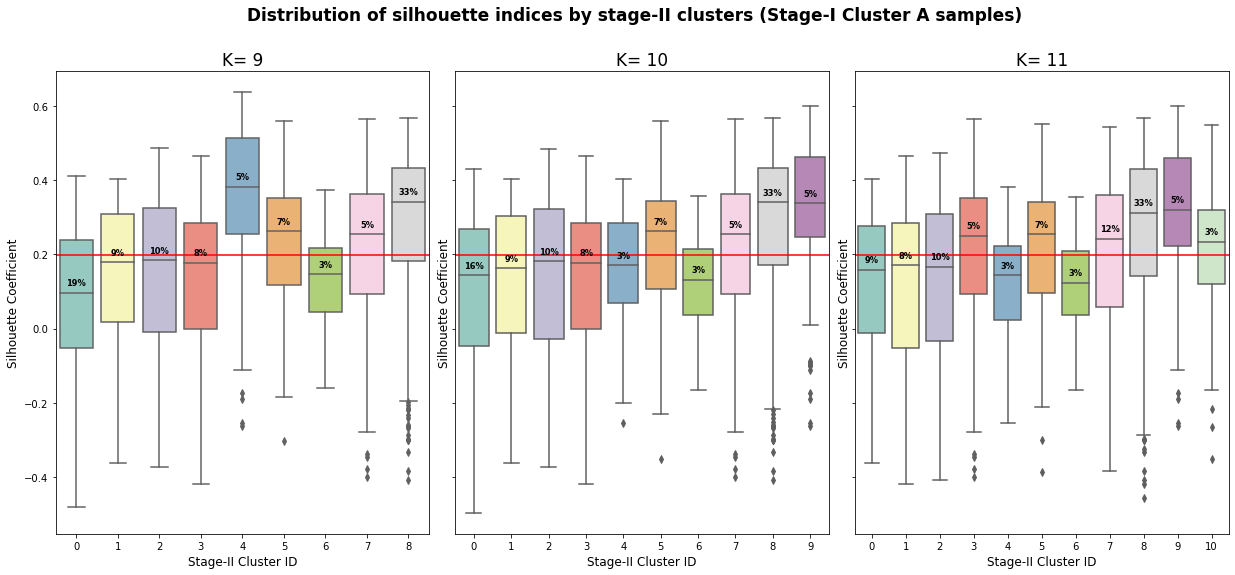

In [33]:
fig,axes =  plt.subplots(1,3,figsize=(17,7),sharey=True)
fig.tight_layout(pad=1)
fig.suptitle('Distribution of silhouette indices by stage-II clusters (Stage-I Cluster A samples)',fontsize=17,fontweight="bold",y=1.10)

for y,j in enumerate(C1_test):
    b1=sns.boxplot(ax=axes[y],x=S1C1_label_byK[j], y=ind_Sil_C1[y],palette="Set3")
    b1.set_xlabel("Stage-II Cluster ID", fontsize=12)
    b1.set_ylabel('Silhouette Coefficient',fontsize=12)
    axes[y].axhline(Ts_Sil_5[0][j], c='r')
    axes[y].set_title('K= %d' % (j+2),fontsize=17)
    
    medians=[np.median(ind_Sil_C1[y][S1C1_label_byK[j]==i]) for i in range(j+2)] 
    
    for xtick in axes[y].get_xticks():
        axes[y].text(xtick,medians[xtick] + 0.02, str(C1_size[y][xtick])+"%", 
            horizontalalignment='center',size='small',color='black',weight='semibold')

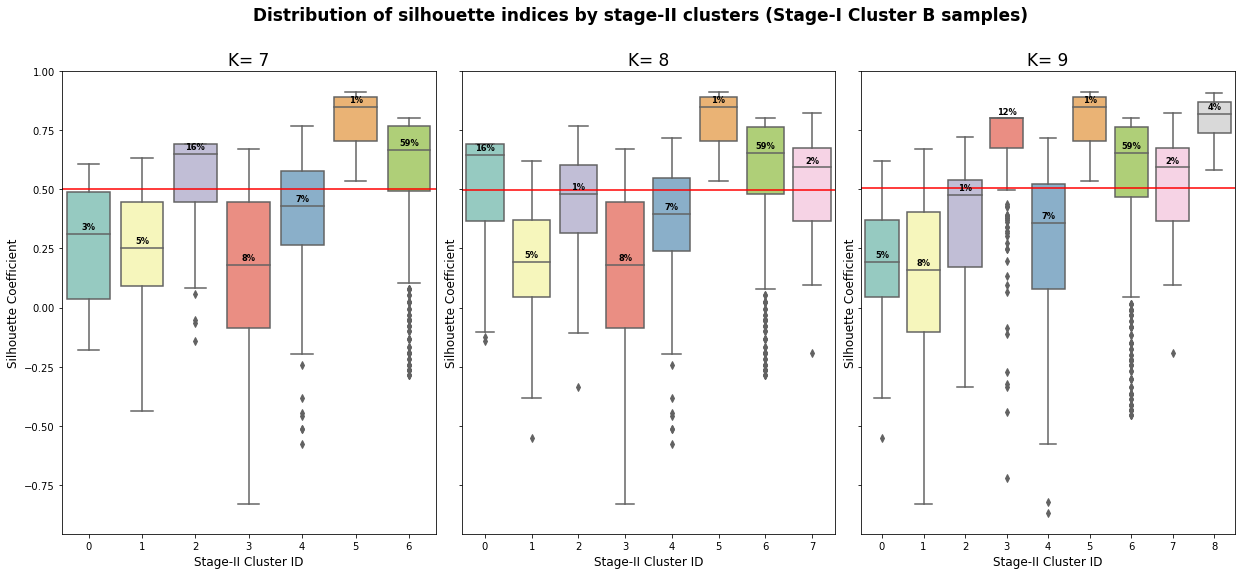

In [34]:
fig,axes =  plt.subplots(1,3,figsize=(17,7),sharey=True)
fig.tight_layout(pad=1)
fig.suptitle('Distribution of silhouette indices by stage-II clusters (Stage-I Cluster B samples)',fontsize=17,fontweight="bold",y=1.10)

for y,j in enumerate(C2_test):
    b1=sns.boxplot(ax=axes[y],x=S1C2_label_byK[j], y=ind_Sil_C2[y],palette="Set3")
    b1.set_xlabel("Stage-II Cluster ID", fontsize=12)
    b1.set_ylabel('Silhouette Coefficient',fontsize=12)
    axes[y].axhline(Ts_Sil_5[1][j], c='r')
    axes[y].set_title('K= %d' % (j+2),fontsize=17)
    
    medians=[np.median(ind_Sil_C2[y][S1C2_label_byK[j]==i]) for i in range(j+2)] 
    
    for xtick in axes[y].get_xticks():
        axes[y].text(xtick,medians[xtick] + 0.02, str(C2_size[y][xtick])+"%", 
                     horizontalalignment='center',size='small',color='black',weight='semibold')


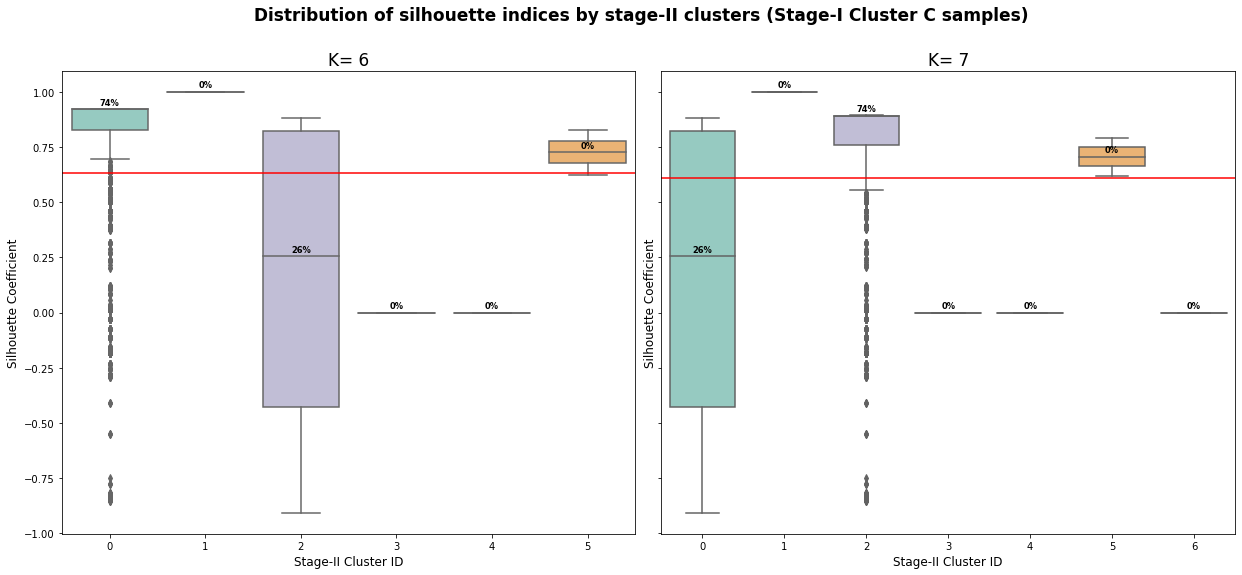

In [35]:
fig,axes =  plt.subplots(1,2,figsize=(17,7),sharey=True)
fig.tight_layout(pad=1)
fig.suptitle('Distribution of silhouette indices by stage-II clusters (Stage-I Cluster C samples)',fontsize=17,fontweight="bold",y=1.10)

for y,j in enumerate(C3_test):
    b1=sns.boxplot(ax=axes[y],x=S1C3_label_byK[j], y=ind_Sil_C3[y],palette="Set3")
    b1.set_xlabel("Stage-II Cluster ID", fontsize=12)
    b1.set_ylabel('Silhouette Coefficient',fontsize=12)
    axes[y].axhline(Ts_Sil_15[2][j], c='r')
    axes[y].set_title('K= %d' % (j+2),fontsize=17)
    
    medians=[np.median(ind_Sil_C3[y][S1C3_label_byK[j]==i]) for i in range(j+2)] 
    
    for xtick in axes[y].get_xticks():
        axes[y].text(xtick,medians[xtick] + 0.02, str(C3_size[y][xtick])+"%", 
                     horizontalalignment='center',size='small',color='black',weight='semibold')

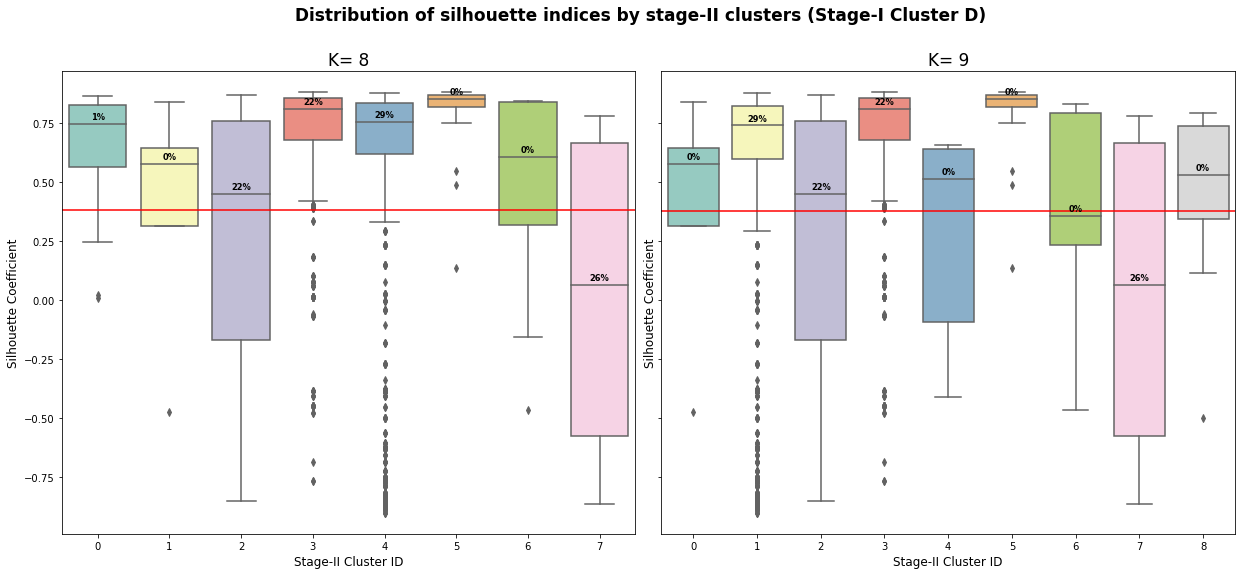

In [36]:
fig,axes =  plt.subplots(1,2,figsize=(17,7),sharey=True)
fig.tight_layout(pad=1)
fig.suptitle('Distribution of silhouette indices by stage-II clusters (Stage-I Cluster D)',fontsize=17,fontweight="bold",y=1.10)

for y,j in enumerate(C4_test):
    b1=sns.boxplot(ax=axes[y],x=S1C4_label_byK[j], y=ind_Sil_C4[y],palette="Set3")
    b1.set_xlabel("Stage-II Cluster ID", fontsize=12)
    b1.set_ylabel('Silhouette Coefficient',fontsize=12)
    axes[y].axhline(Ts_Sil_15[3][j], c='r')
    axes[y].set_title('K= %d' % (j+2),fontsize=17)
    
    medians=[np.median(ind_Sil_C4[y][S1C4_label_byK[j]==i]) for i in range(j+2)] 
    
    for xtick in axes[y].get_xticks():
        axes[y].text(xtick,medians[xtick] + 0.02, str(C4_size[y][xtick])+"%", 
                     horizontalalignment='center',size='small',color='black',weight='semibold')

### Visualize Stage-II clustered dendrograms among each Stage-I cluster sample set

In [38]:
# Build a helper function to visualize dendrogram
## Code reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

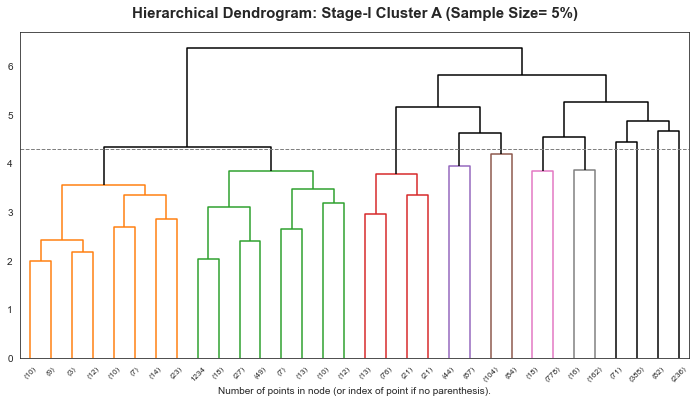

In [42]:
#Graph dendgrogram for Stage-I Cluster A samples (5%) - discover 11 stage-II clusters
from scipy.cluster import hierarchy

model = AHC(affinity='precomputed', linkage='average',n_clusters=None, distance_threshold=0)
model = model.fit(DISTM_5[0])

sns.set_style("white")
plt.figure(figsize=(12,6))
plt.title('Hierarchical Dendrogram: Stage-I Cluster A (Sample Size= 5%)', fontweight="bold",y=1.025, fontsize=15)
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=4,color_threshold=4.3,above_threshold_color='k')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(y=4.3, c='grey', lw=1, linestyle='dashed')


plt.show()

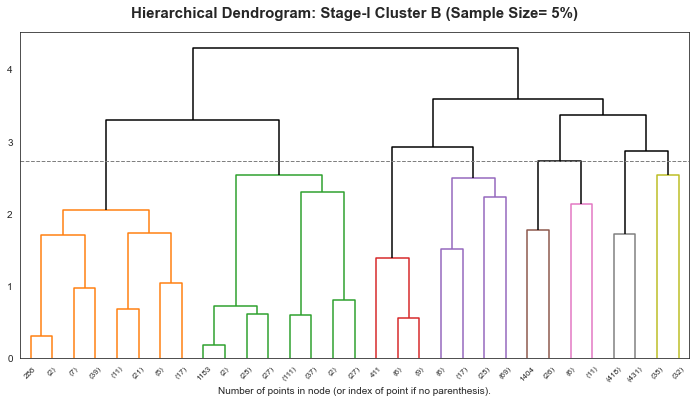

In [43]:
#Graph dendgrogram for Stage-I Cluster B samples (5%) - discover 8 stage-II clusters
from scipy.cluster import hierarchy

model = AHC(affinity='precomputed', linkage='average',n_clusters=None, distance_threshold=0)
model = model.fit(DISTM_5[1])

sns.set_style("white")
plt.figure(figsize=(12,6))
plt.title('Hierarchical Dendrogram: Stage-I Cluster B (Sample Size= 5%)', fontweight="bold",y=1.025, fontsize=15)
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=4,color_threshold=2.74,above_threshold_color='k')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(y=2.74, c='grey', lw=1, linestyle='dashed')


plt.show()

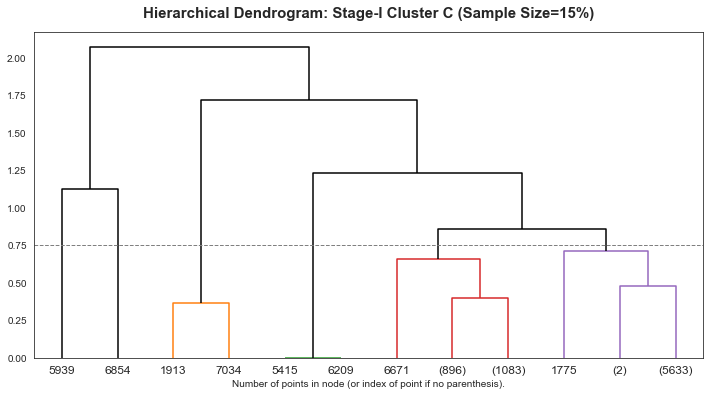

In [44]:
#Graph dendgrogram for Stage-I Cluster C samples (15%) - discover 6 stage-II clusters
from scipy.cluster import hierarchy

model = AHC(affinity='precomputed', linkage='average',n_clusters=None, distance_threshold=0)
model = model.fit(DISTM_15[2])

sns.set_style("white")
plt.figure(figsize=(12,6))
plt.title('Hierarchical Dendrogram: Stage-I Cluster C (Sample Size=15%)', fontweight="bold",y=1.025, fontsize=15)
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5,color_threshold=0.75,above_threshold_color='k')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(y=0.75, c='grey', lw=1, linestyle='dashed')


plt.show()

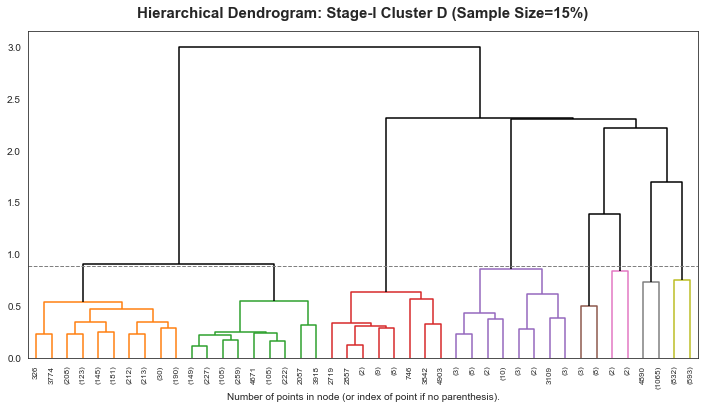

In [45]:
#Graph dendgrogram for Stage-I Cluster D samples (15%) - discover 8 stage-II clusters
from scipy.cluster import hierarchy

model = AHC(affinity='precomputed', linkage='average',n_clusters=None, distance_threshold=0)
model = model.fit(DISTM_15[3])

sns.set_style("white")
plt.figure(figsize=(12,6))
plt.title('Hierarchical Dendrogram: Stage-I Cluster D (Sample Size=15%)', fontweight="bold",y=1.025, fontsize=15)
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5,color_threshold=0.88,above_threshold_color='k')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(y=0.88, c='grey', lw=1, linestyle='dashed')


plt.show()

### Visualize the distribution of longitudinal PDC trends by stage-II cluster 

In [46]:
S1C1_PDC_SP5_final=S1C1_PDC_Sample5_labeled[9]
S1C1_DBA_SP5_final=S1C1_DBA_Sample5[9]

S1C2_PDC_SP5_final=S1C2_PDC_Sample5_labeled[6]
S1C2_DBA_SP5_final=S1C2_DBA_Sample5[6]

S1C3_PDC_SP15_final=S1C3_PDC_Sample15_labeled[4]
S1C3_DBA_SP15_final=S1C3_DBA_Sample15[4]

S1C4_PDC_SP15_final=S1C4_PDC_Sample15_labeled[6]
S1C4_DBA_SP15_final=S1C4_DBA_Sample15[6]


In [49]:
#create a helper function to plot the distribution of longitudinal PDC trend
def plotdist(Cluster_PDC,DBA,s1_cluster,s2_cluster,row,col, alph):
    Week=np.arange(103)
    for i in range(len(Cluster_PDC[s2_cluster])):
        a[row][col].plot(Week, Cluster_PDC[s2_cluster][i], "blue", linewidth=1, alpha=alph)
        a[row][col].set_title('Cluster %s.%d' % (s1_cluster,s2_cluster+1),loc='left',fontweight ='bold')
    a[row][col].set_xlabel("Follow-up Time (Weeks)",fontsize=10)
    a[row][col].set_ylabel("PDC",fontsize=10)
    a[row][col].plot(DBA[s2_cluster].ravel(), linewidth=1.5,color="red")

**In the plots below, red line = cluster-specific DBA centroid; blue line = individual PDC trend**

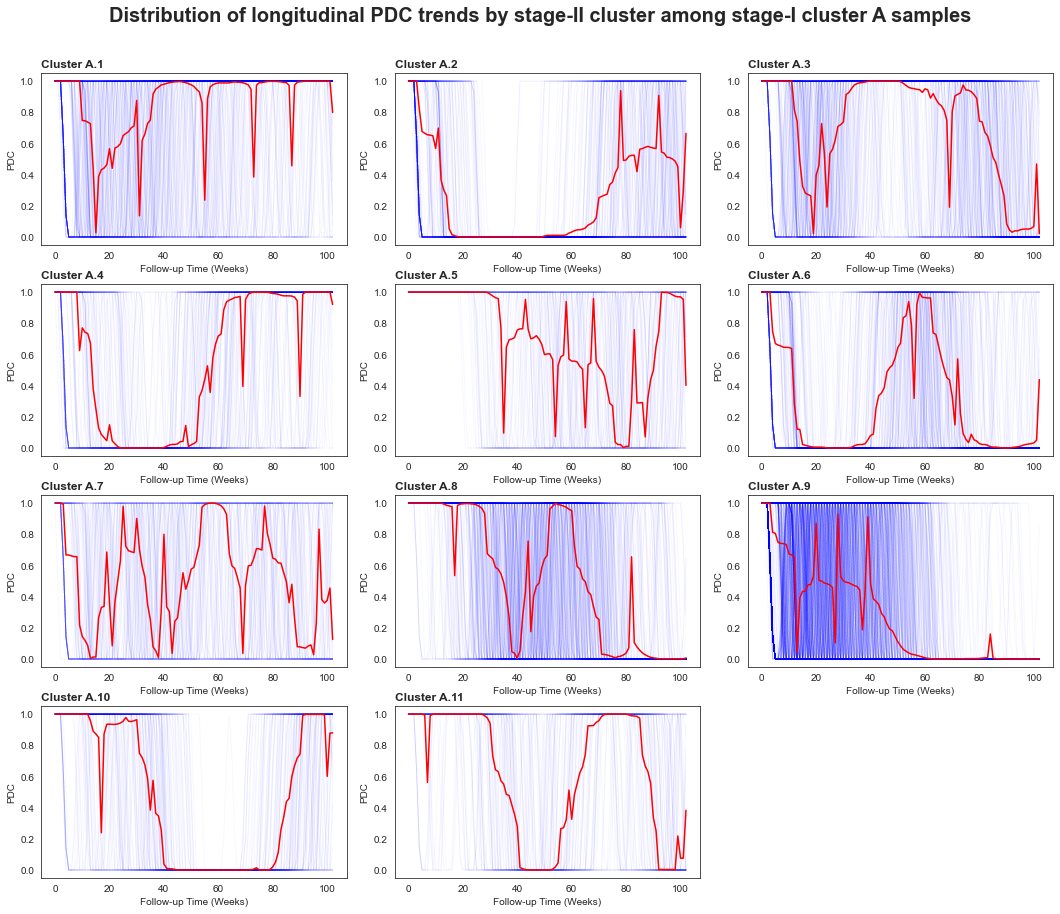

In [53]:
from matplotlib.pyplot import delaxes
alph=0.03
fig,a =  plt.subplots(4,3,figsize=(15,12))
fig.tight_layout(pad=2.0)

fig.suptitle('Distribution of longitudinal PDC trends by stage-II cluster among stage-I cluster A samples', fontsize=20, y=1.05,fontweight="bold")

plotdist(S1C1_PDC_SP5_final,S1C1_DBA_SP5_final,"A",0,0,0,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_DBA_SP5_final,"A",1,0,1,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_DBA_SP5_final,"A",2,0,2,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_DBA_SP5_final,"A",3,1,0,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_DBA_SP5_final,"A",4,1,1,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_DBA_SP5_final,"A",5,1,2,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_DBA_SP5_final,"A",6,2,0,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_DBA_SP5_final,"A",7,2,1,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_DBA_SP5_final,"A",8,2,2,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_DBA_SP5_final,"A",9,3,0,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_DBA_SP5_final,"A",10,3,1,alph)
fig.delaxes(a[3,2])
plt.show()

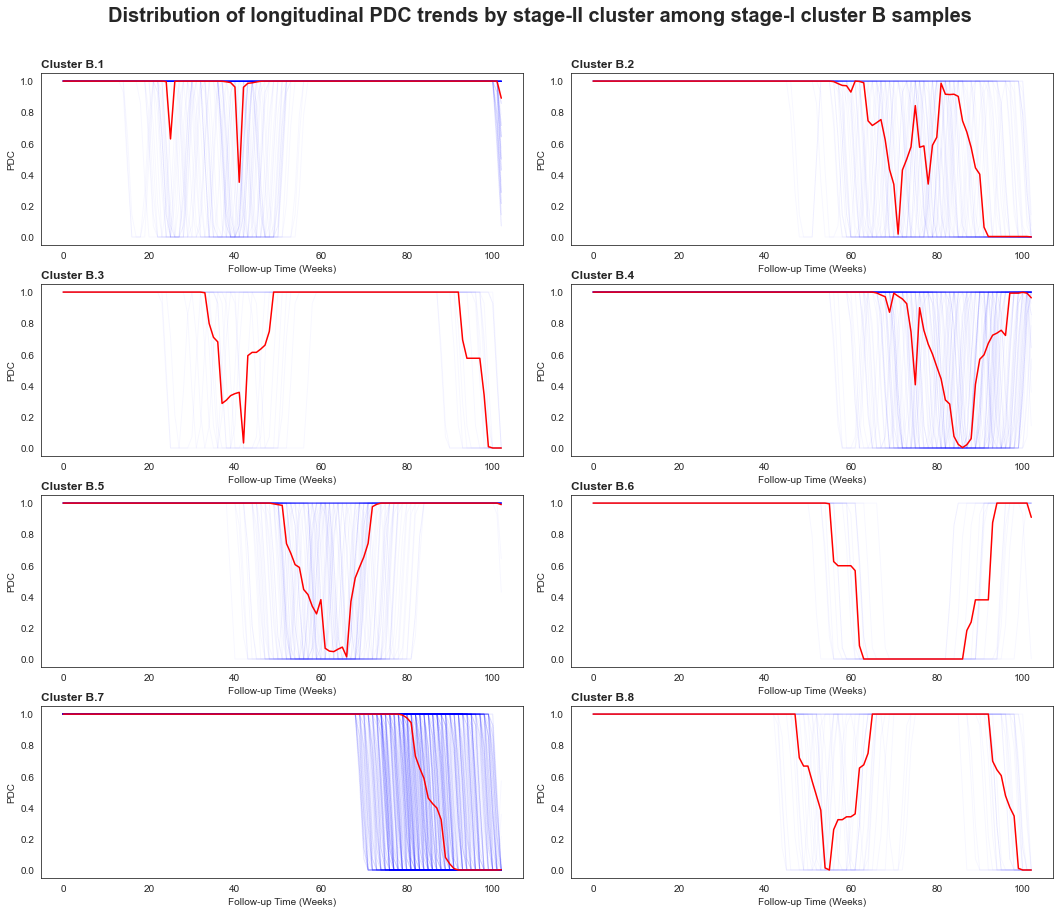

In [54]:
#cluster 2: 8
alpha=0.1
fig,a =  plt.subplots(4,2,figsize=(15,12))
fig.tight_layout(pad=2.0)

fig.suptitle('Distribution of longitudinal PDC trends by stage-II cluster among stage-I cluster B samples', fontsize=20, y=1.05,fontweight="bold")

plotdist(S1C2_PDC_SP5_final,S1C2_DBA_SP5_final,"B",0,0,0,alph)
plotdist(S1C2_PDC_SP5_final,S1C2_DBA_SP5_final,"B",1,0,1,alph)
plotdist(S1C2_PDC_SP5_final,S1C2_DBA_SP5_final,"B",2,1,0,alph)
plotdist(S1C2_PDC_SP5_final,S1C2_DBA_SP5_final,"B",3,1,1,alph)
plotdist(S1C2_PDC_SP5_final,S1C2_DBA_SP5_final,"B",4,2,0,alph)
plotdist(S1C2_PDC_SP5_final,S1C2_DBA_SP5_final,"B",5,2,1,alph)
plotdist(S1C2_PDC_SP5_final,S1C2_DBA_SP5_final,"B",6,3,0,alph)
plotdist(S1C2_PDC_SP5_final,S1C2_DBA_SP5_final,"B",7,3,1,alph)
plt.show()

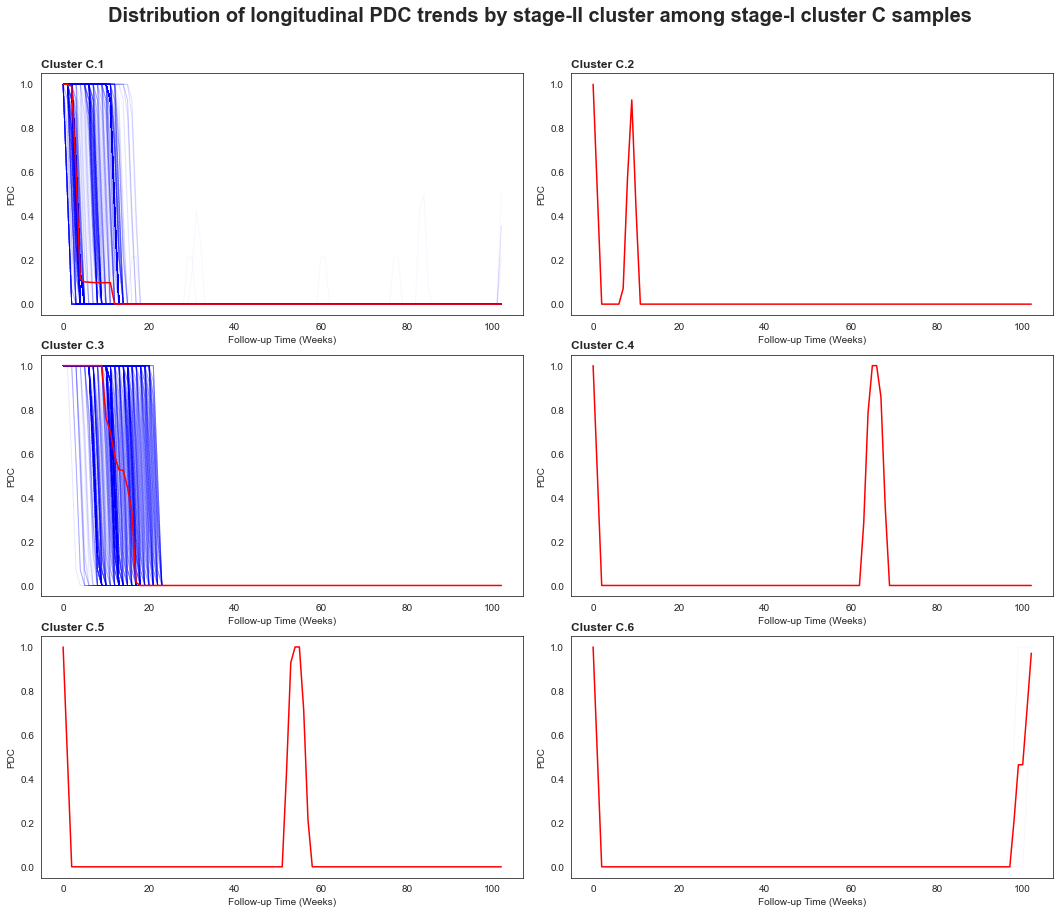

In [55]:
#cluster 3: 6
alpha=0.05
fig,a =  plt.subplots(3,2,figsize=(15,12))
fig.tight_layout(pad=2.0)

fig.suptitle('Distribution of longitudinal PDC trends by stage-II cluster among stage-I cluster C samples', fontsize=20, y=1.05,fontweight="bold")

plotdist(S1C3_PDC_SP15_final,S1C3_DBA_SP15_final,"C",0,0,0,alph)
plotdist(S1C3_PDC_SP15_final,S1C3_DBA_SP15_final,"C",1,0,1,alph)
plotdist(S1C3_PDC_SP15_final,S1C3_DBA_SP15_final,"C",2,1,0,alph)
plotdist(S1C3_PDC_SP15_final,S1C3_DBA_SP15_final,"C",3,1,1,alph)
plotdist(S1C3_PDC_SP15_final,S1C3_DBA_SP15_final,"C",4,2,0,alph)
plotdist(S1C3_PDC_SP15_final,S1C3_DBA_SP15_final,"C",5,2,1,alph)

plt.show()

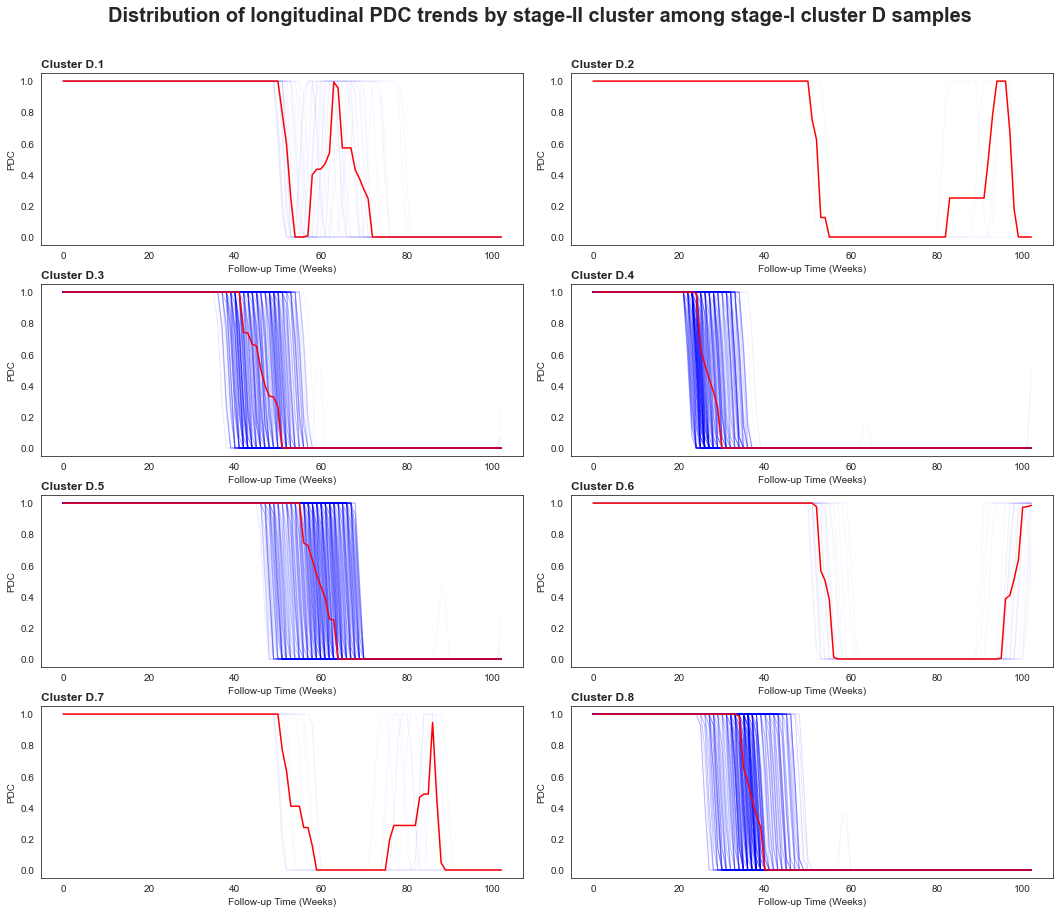

In [56]:
#cluster 4: 8
alpha=0.05
fig,a =  plt.subplots(4,2,figsize=(15,12))
fig.tight_layout(pad=2.0)

fig.suptitle('Distribution of longitudinal PDC trends by stage-II cluster among stage-I cluster D samples', fontsize=20, y=1.05,fontweight="bold")


plotdist(S1C4_PDC_SP15_final,S1C4_DBA_SP15_final,"D",0,0,0,alph)
plotdist(S1C4_PDC_SP15_final,S1C4_DBA_SP15_final,"D",1,0,1,alph)
plotdist(S1C4_PDC_SP15_final,S1C4_DBA_SP15_final,"D",2,1,0,alph)
plotdist(S1C4_PDC_SP15_final,S1C4_DBA_SP15_final,"D",3,1,1,alph)
plotdist(S1C4_PDC_SP15_final,S1C4_DBA_SP15_final,"D",4,2,0,alph)
plotdist(S1C4_PDC_SP15_final,S1C4_DBA_SP15_final,"D",5,2,1,alph)
plotdist(S1C4_PDC_SP15_final,S1C4_DBA_SP15_final,"D",6,3,0,alph)
plotdist(S1C4_PDC_SP15_final,S1C4_DBA_SP15_final,"D",7,3,1,alph)
plt.show()

In [944]:
# #store DBA and PDC grouped by stage II cluster as pickle files
# stage2obj={'S1C1_DBA_SP5_final':S1C1_DBA_SP5_final,
#            'S1C2_DBA_SP5_final':S1C2_DBA_SP5_final,
#            'S1C3_DBA_SP15_final':S1C3_DBA_SP15_final,
#            'S1C4_DBA_SP15_final':S1C4_DBA_SP15_final,
#            'S1C1_PDC_SP5_final':S1C1_PDC_SP5_final,
#            'S1C2_PDC_SP5_final':S1C2_PDC_SP5_final,
#            'S1C3_PDC_SP15_final':S1C3_PDC_SP15_final,
#            'S1C4_PDC_SP15_final':S1C4_PDC_SP15_final,
#            'S1C1_PDC_Sample5_labeled':S1C1_PDC_Sample5_labeled,
#            'S1C2_PDC_Sample5_labeled':S1C2_PDC_Sample5_labeled,
#            'S1C3_PDC_Sample15_labeled':S1C3_PDC_Sample15_labeled,
#            'S1C4_PDC_Sample15_labeled':S1C4_PDC_Sample15_labeled,
#            'S1C1_DBA_Sample5':S1C1_DBA_Sample5,
#            'S1C2_DBA_Sample5':S1C2_DBA_Sample5,
#            'S1C3_DBA_Sample15':S1C3_DBA_Sample15,
#            'S1C4_DBA_Sample15':S1C4_DBA_Sample15}

# import pickle
# pickle_out=open("stageII_obj","wb")
# pickle.dump(stage2obj,pickle_out)
# pickle_out.close()

### Merge clusters from the initial two-stage clustering analysis to obtain final set of PDC patterns 

Examine the marginal relative frequences of cluster membership

In [93]:
#Compute relative frequencies of stage-II cluster membershp, conditioned on stage-I cluster membership
rel_freq=pd.Series(np.array(S1C1_label_byK)[C1_test][2]).value_counts()/len(np.array(S1C1_label_byK)[C1_test][2])
C1_size_p=list(rel_freq.sort_index())

rel_freq=pd.Series(np.array(S1C2_label_byK)[C2_test][1]).value_counts()/len(np.array(S1C2_label_byK)[C2_test][1])
C2_size_p=list(rel_freq.sort_index())

rel_freq=pd.Series(np.array(S1C3_label_byK)[C3_test][0]).value_counts()/len(np.array(S1C3_label_byK)[C3_test][0])
C3_size_p=list(rel_freq.sort_index())

rel_freq=pd.Series(np.array(S1C4_label_byK)[C4_test][0]).value_counts()/len(np.array(S1C4_label_byK)[C4_test][0])
C4_size_p=list(rel_freq.sort_index())


S2_size_cp=[C1_size_p,C2_size_p,C3_size_p,C4_size_p]

In [94]:
#Compute relative frequencies of stage-I cluster membership
import pickle
pickle_in=open("PDC_S1","rb")
PDC_S1=pickle.load(pickle_in)

size=np.array([len(PDC_S1[i]) for i in range(len(PDC_S1))])
S1_size_p=[i/sum(size) for i in size]

In [120]:
#Compute the marginal relative frequencies of cluster membership. 
##Ex: P(cluster=A.2)=P(stage-I cluster=A)*P(stage-II cluster=2|stage-I cluster=A)
cluster_size_mp=[]
for i in range(len(S1_size_p)):
    cluster_size_mp.append(list(S1_size_p[i]*np.array(S2_size_cp[i])))
    
cluster_size_mp_flatten=[cluster_size_mp[i][j] for i in range(len(cluster_size_mp)) for j in range(len(cluster_size_mp[i]))]

In [121]:
#Create x-axis tick label for cluster membership
cluster_k=[]
for i in range(len(S2_size_cp)):
    cn=list(np.arange(len(S2_size_cp[i]))+1)
    cluster_k.append(cn)
    
S1C_label=["A","B","C","D"]    
X=['%s.%d' % (S1C_label[i],j) for i in range(len(cluster_k)) for j in cluster_k[i]]

Text(0, 0.5, 'Relative Frequency')

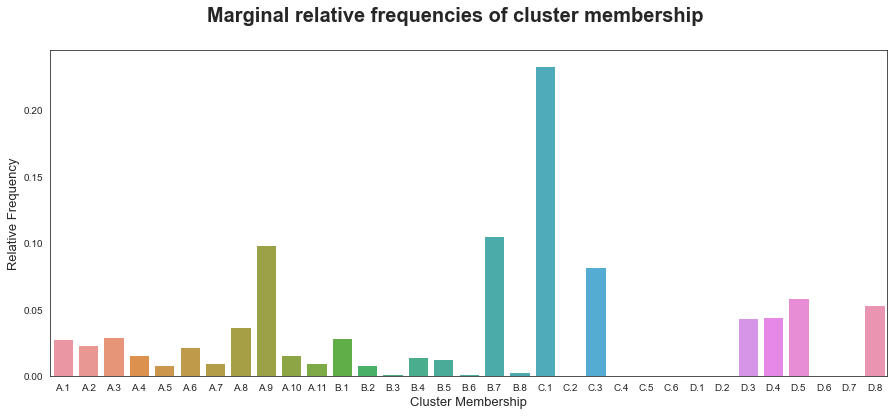

In [128]:
fig,a =  plt.subplots(figsize=(15,6))
fig.suptitle('Marginal relative frequencies of cluster membership', fontsize=20, fontweight="bold")
a=sns.barplot(x=X, y=cluster_size_mp_flatten)
a.set_xlabel("Cluster Membership", fontsize=13)
a.set_ylabel("Relative Frequency", fontsize=13)

To create representative DBA for the final merged clusters, we need to weight each DBA centroid based on its original cluster's relative frequency by synthesizing a centroid dataset of size=500 where the frequency of each centroid follows the marginal relative frequency of its original cluster. 

In [147]:
syn_cluster_size=np.rint(np.array(cluster_size_mp_flatten)*500)

In [148]:
#create a list object to store all 33 DBA centroids
SC_DBA_list=[S1C1_DBA_SP5_final,S1C2_DBA_SP5_final,S1C3_DBA_SP15_final,S1C4_DBA_SP15_final]
import itertools
SC_DBA_list_f = list(itertools.chain(*SC_DBA_list))

In [149]:
#indicate which DBA centroid would at least 1 frequency count in the synthetic centroid dataset (n=500)
frequent=syn_cluster_size>0
freq_DBA_flist=list(np.array(SC_DBA_list_f)[frequent])
freq_size=syn_cluster_size[frequent]

In [162]:
#replicate DBA centroids according to the frequency count they would have in the synethetic centroid dataset
freq_DBA_resize=[]
for i in range(len(freq_size)):
    a=[freq_DBA_flist[i].ravel()]*freq_size[i].astype(int)
    freq_DBA_resize.append(a)
freq_DBA_resize_f=list(itertools.chain(*freq_DBA_resize))

In [165]:
#compute pairwise DTW distance matrix among the DBA centroids in the centroid dataset
num=len(freq_DBA_resize_f)
freq_DBA_dist_matrix=np.zeros((num,num))
for i in range(num):
    for j in range(num):
        freq_DBA_dist_matrix[i,j]=dtw(freq_DBA_resize_f[i],freq_DBA_resize_f[j],global_constraint="sakoe_chiba", sakoe_chiba_radius=10)

In [167]:
#Implement hierarchical clusteirng algo for various k
freq_DBA_label=[]
for k in range(2,15):
    cluster = AHC(affinity='precomputed', linkage='average',n_clusters=k).fit(freq_DBA_dist_matrix)
    freq_DBA_label.append(cluster.labels_)

In [168]:
#Compute DBA centroid for the new merged clusters under each k value
freq_labeled_DBA_byk=group_PDC(np.array(freq_DBA_resize_f),freq_DBA_label,15)
final_freq_DBA_byk=SC_DBA(freq_labeled_DBA_byk)

Complete k= 2
Complete k= 3
Complete k= 4
Complete k= 5
Complete k= 6
Complete k= 7
Complete k= 8
Complete k= 9
Complete k= 10
Complete k= 11
Complete k= 12
Complete k= 13
Complete k= 14


In [172]:
#Compute SSE to help determine the optimal number of clusters to merge into 
freqDBA_SSE=[]
for k in range(len(final_freq_DBA_byk)):         
    d=[dtw(freq_labeled_DBA_byk[k][cluster_id][i],final_freq_DBA_byk[k][cluster_id],
        global_constraint="sakoe_chiba", sakoe_chiba_radius=10) 
        for cluster_id in range(len(final_freq_DBA_byk[k])) 
        for i in range(len(freq_labeled_DBA_byk[k][cluster_id]))]
    SSE=sum(np.square(d))
    freqDBA_SSE.append(SSE)

Text(47.0, 0.5, 'SSE')

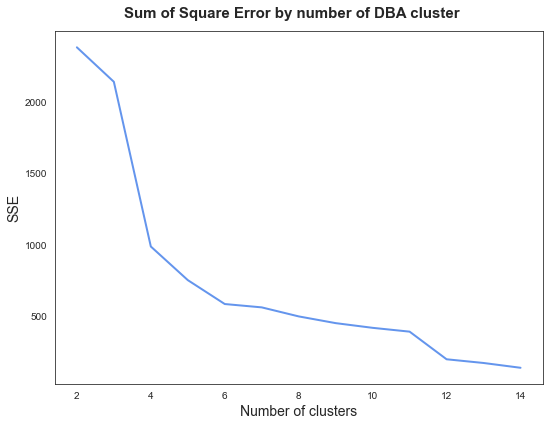

In [173]:
lin=np.arange(2,15)
fig,ax =  plt.subplots(figsize=(8,6))
fig.tight_layout(pad=3)
fig.suptitle('Sum of Square Error by number of DBA cluster',fontsize=15,fontweight="bold")
ax.plot(lin,freqDBA_SSE, "cornflowerblue", linewidth=2)
ax.set_xlabel('Number of clusters', fontsize=14)
ax.set_ylabel('SSE', fontsize=14)

In [193]:
#build a helper function to plot DBA centroids of the new merged cluster
def plotdist2(cluster,row,col, alph,order):
    Week=np.arange(103)
    for i in range(len(freq_DBA_clustered[cluster])):
        a[row][col].plot(Week, freq_DBA_clustered[cluster][i], "orange", linewidth=1, alpha=alph)
    a[row][col].set_title('Pattern %d (sample size: %s)' % (order,str(proto_percent[cluster])+"%"),loc='left',fontweight ='bold', fontsize=14)
    a[row][col].set_xlabel("Follow-up Time (Weeks)",fontsize=12)
    a[row][col].set_ylabel("PDC",fontsize=12)
    a[row][col].plot(final_freq_DBA[cluster].ravel(), linewidth=3,color="red")
    a[row][col].plot(final_freq_DBA_CMA[cluster].ravel(), linewidth=2,color="blue")

In [186]:
#build a helper function to cluster the centroids and compute the new DBA of the new merged cluster as per the input of k value
def final_DBA(K):
    DBA_cluster = AHC(affinity='precomputed', linkage='average',n_clusters=K).fit(freq_DBA_dist_matrix)
    DBA_aggr_label=DBA_cluster.labels_

    freq_DBA_clustered=[]
    for i in range(len(cl.Counter(DBA_aggr_label))):
        a=np.array(freq_DBA_resize_f)[DBA_aggr_label==i]
        freq_DBA_clustered.append(a)

    final_freq_DBA=[]
    for i in range(len(freq_DBA_clustered)):
        a=dtw_barycenter_averaging(freq_DBA_clustered[i], max_iter=10, metric_params=param)
        final_freq_DBA.append(a)

    final_freq_DBA_CMA=[]
    for i in range(len(final_freq_DBA)):
        a=pd.Series(final_freq_DBA[i].ravel()).rolling(window=4,center=True).mean()
        final_freq_DBA_CMA.append(a)
    return freq_DBA_clustered,final_freq_DBA,final_freq_DBA_CMA,DBA_aggr_label

## Final presentation of common PDC patterns

In [187]:
freq_DBA_clustered,final_freq_DBA,final_freq_DBA_CMA,DBA_aggr_label=final_DBA(6)

In [189]:
proto_frequency=pd.Series(DBA_aggr_label).value_counts()/len(DBA_aggr_label)*sum(np.array(cluster_size_mp_flatten)[frequent])
proto_percent=np.round(proto_frequency.sort_index()*100,1)

**In the plot below:** <br>
**Red line** = the new DBA centroid; <br> 
**Blue line** = the new DBA centroid smoothened (moving average window size=4 weeks); <br>
**Orange line**= individual DBA centroid from the original 33 clusters

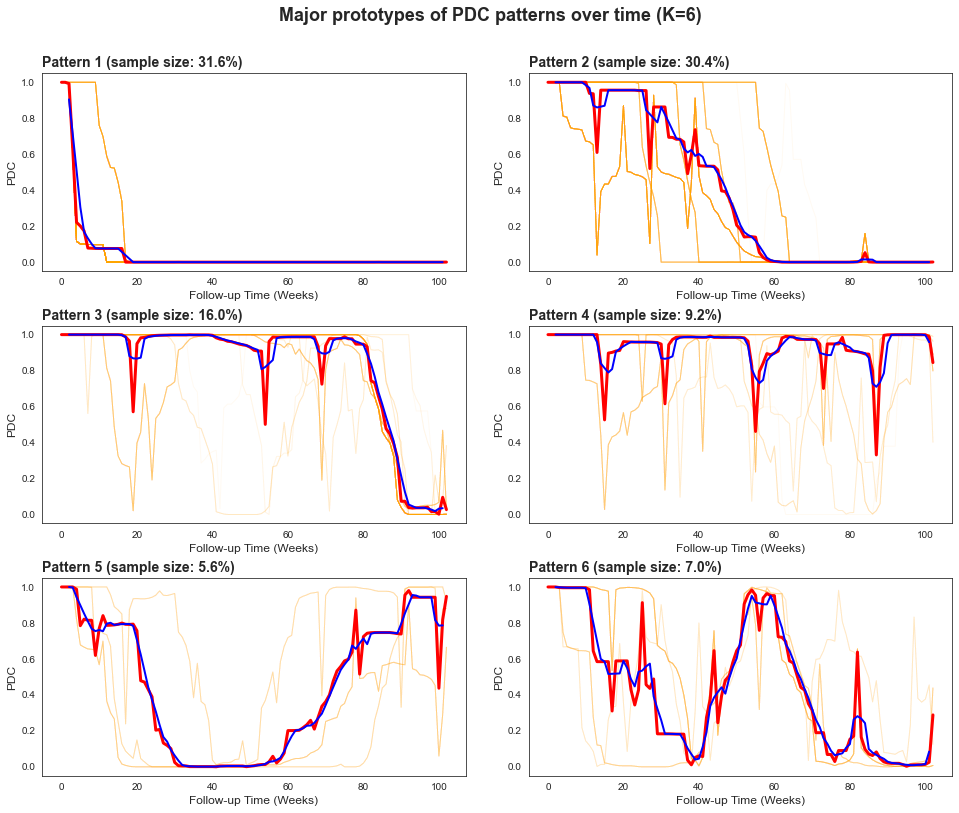

In [195]:
alpha=0.05
fig,a =  plt.subplots(3,2,figsize=(14,11))
fig.suptitle('Major prototypes of PDC patterns over time (K=6)',fontsize=18,fontweight="bold", y=1.035)
fig.tight_layout(pad=3.5)
plotdist2(3,0,0,alpha,1)
plotdist2(4,0,1,alpha,2)
plotdist2(2,1,0,alpha,3)
plotdist2(5,1,1,alpha,4)
plotdist2(0,2,0,alpha,5)
plotdist2(1,2,1,alpha,6)
plt.show()